# DEEP LEARNING PROJECT - FAKE NEWS DETECTION

## I. Problem Definition

Dalam era digital yang begitu cepat berkembang, informasi menjadi salah satu aspek kunci yang memengaruhi keputusan dan pandangan masyarakat. Namun, perkembangan teknologi juga membawa tantangan baru, salah satunya adalah maraknya penyebaran berita palsu atau hoaks. Berita palsu dapat merugikan individu, kelompok, bahkan negara secara keseluruhan. Oleh karena itu, deteksi berita palsu menjadi suatu kebutuhan mendesak dalam upaya memelihara integritas informasi.

Project ini dilakukan dengan tujuan untuk menjelaskan penerapan deep learning dalam deteksi berita palsu. Deep learning merupakan cabang dari kecerdasan buatan (artificial intelligence) yang menggunakan model neural networks dengan lapisan-lapisan (layers) yang kompleks untuk memahami dan memproses data. Kecanggihan deep learning dalam memahami pola-pola kompleks membuatnya menjadi pendekatan yang potensial dalam mengidentifikasi berita palsu yang sering kali tersusun dengan sangat cermat.

Dengan menggabungkan kemampuan deep learning dalam memproses data tekstual dan citra, penelitian ini berusaha memberikan solusi yang efektif dan efisien dalam meminimalkan penyebaran berita palsu. Melalui analisis mendalam terhadap dataset berita dan pengembangan model-model deep learning yang canggih, diharapkan dapat tercipta sistem deteksi berita palsu yang lebih akurat dan responsif terhadap dinamika informasi yang terus berkembang.

## II. Data Understading

Data yang akan kita gunakan adalah data berasal dari scrapping Twitter/X dengan kolom antara lain:
- Title : Teks berupa judul berita.
- News Url : LInk berita
- Source : Website seumber berita
- Tweet_num : Sudah berapa kali berita tersebut tweet/post ulang (Retweet)
- Real : Konfirmasi apakah berita tersebuat benar (1) atau Hoax (0)

### Import Packages

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words("english")

import tensorflow as tf
import datetime
import warnings
import re
import time

from sklearn.metrics import classification_report,confusion_matrix



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jkurn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jkurn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jkurn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Data

In [2]:
df = pd.read_csv(r'D:\PELATIHAN DATA SCIENCE\Deep Learning\FakeNewsNet.csv')

In [3]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


### Cleaning Data

Pada tahap ini akan dilakukan pengecekan terhadap data yang missing, apabila ditemukan data yang missing maka akan diremove.

In [4]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [5]:
# Mengecek Missing Value
df.isna().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [6]:
# Drop Missing Value
data = df.dropna()

In [7]:
data.isna().sum()

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22866 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          22866 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      22866 non-null  int64 
 4   real           22866 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [9]:
data['source_domain'].value_counts()

people.com                1786
www.dailymail.co.uk        964
en.wikipedia.org           741
www.usmagazine.com         709
www.etonline.com           666
                          ... 
bioguide.congress.gov        1
dailyheadlines.net           1
www.duggarfamily.com         1
www.naturallycurly.com       1
flashnewscorner.com          1
Name: source_domain, Length: 2441, dtype: int64

## III. Exploratory Data Analysis

### Real and Fake Proportional

<Axes: xlabel='real', ylabel='count'>

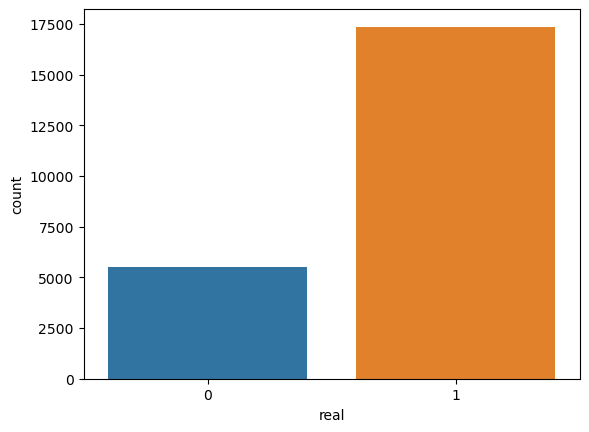

In [10]:
# Buat Tabel Count
sns.countplot(data = data,
              x = 'real')

In [11]:
# Count occurrences of unique values in the 'your_column'
value_counts = data['real'].value_counts()

# Display the result
print(value_counts)

1    17371
0     5495
Name: real, dtype: int64


Sebanyak 75,96% (atau 17.371 data) merupakan data berita yang terverifikasi kebenarannya sedangkan sisanya yaitu sebesar 24.04% atu 5.495 merupakan data yang terverifikasi tidak benar (Fake News)

### WordClouds

In [12]:
STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

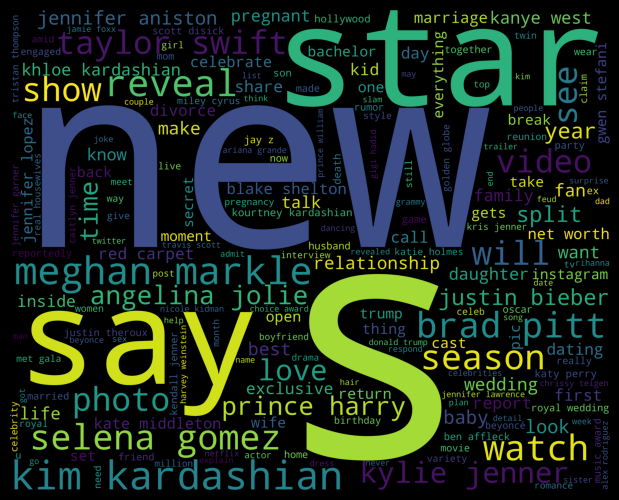

In [13]:
text = data.title.values

Plot_world(text)

Berdasarkan hasil WordCloud dapat diketahui bahwa Berita yang di analysis adalah InsudtriEntertainment Hollywood, dimana terdapat beberapa entertainer yang menjadi topik dalam pemberitaan. 

### Text Cleansing

Pada Text Cleansing, kita akan lakukan cleaning data pada judul berita dengan ketentuan menghilangkan huruf kapital pada awal kata dan btanda baca. Metode yang digunakan adalah WordNetLemmatizer, adalah bagian dari pustaka Natural Language Toolkit (NLTK) yang digunakan untuk melakukan lemmatisasi, suatu proses di bidang pemrosesan bahasa alami yang bertujuan untuk mengubah kata ke bentuk dasarnya (lemma).

In [14]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemTitles(title):
    words = nltk.word_tokenize(title)
    words = [re.sub("[^a-zA-Z0-9]","",i).lower().strip() for i in words]
    words = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]
    title = " ".join(words)
    return title

data["title"] = data["title"].apply(lemTitles)
data.head()

C:\Users\jkurn\AppData\Local\Temp\ipykernel_1688\3951654844.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["title"] = data["title"].apply(lemTitles)


,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes rape accusation real ho...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people choice award 2018 best red carpet look,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message one t...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma spark rumour inappropr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl 10 year later upper east siders s...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


Terlihat output pada judul sudahmengahsilkan pola yang sama, (huruf kapital mnejadi biasa dan tidak terdapat tanda baca), selanjutnya kita lakukan drop pada kolom lain karena yang digunakan sebagai predictor adalah kolom 'Title'

In [15]:
data = data.drop(['news_url','source_domain','tweet_num'],axis=1)
data.head()

,title,real
0,kandi burruss explodes rape accusation real ho...,1
1,people choice award 2018 best red carpet look,1
2,sophia bush sends sweet birthday message one t...,1
3,colombian singer maluma spark rumour inappropr...,1
4,gossip girl 10 year later upper east siders s...,1


In [16]:
# How many unique words have this text
from collections import Counter

def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [17]:
text_values = data["title"]
counter = counter_word(text_values)

print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:10]

The len of unique words is: 16649


[('kandi', 6),
 ('burruss', 6),
 ('explodes', 8),
 ('rape', 40),
 ('accusation', 24),
 ('real', 258),
 ('housewife', 144),
 ('atlanta', 48),
 ('reunion', 156),
 ('video', 442)]

In [18]:
# X=pd.DataFrame(X, columns = feature_names)
X = data['title']
X.head()

0    kandi burruss explodes rape accusation real ho...
1       people choice award 2018  best red carpet look
2    sophia bush sends sweet birthday message one t...
3    colombian singer maluma spark rumour inappropr...
4    gossip girl 10 year later  upper east siders s...
Name: title, dtype: object

In [19]:
y = data['real']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: real, dtype: int64

## IV. Deep Learning Preparation

### Split Data

Kita akan melakukan Split data menjadi data Training dan Testing dengan komposisi 80% data training dan 20% data testing. Data Training sebanyak 80% itu akan kita split kembali menjadi 70% data training dan 30% data validation.

In [20]:
#The maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint.
max_length = 20
trunc_type='post'
padding_type='post'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = 6090
seq_len = 12

In [21]:
from sklearn.model_selection import train_test_split

X_train1, X_test ,y_train1 ,y_test = train_test_split(X,y, test_size=0.2,
                                                    stratify=y , random_state=20)

In [22]:
X_train, X_val ,y_train ,y_val = train_test_split(X_train1,y_train1, test_size=0.3,
                                                    stratify=y_train1 , random_state=20)

In [23]:
X_train

9337     janet jackson call police welfare check son  s...
927                       celebrity obsessed royal wedding
6500     ciara strip sexy photoshoot husband russell wi...
19982    britney spear dissected plastic surgeon  overh...
9865     svu  mariska hargitay reopening benson  old wo...
                               ...                        
22584                               marc anthony net worth
19801    olivia newtonjohn talk second breast cancer ba...
874      miz maryse beat daniel bryan brie bella wwe he...
7177     duchess kate  prince william celebrate 7th ann...
315             selena gomez share photo date night weeknd
Name: title, Length: 12804, dtype: object

### Text Preprocessing Part 2

Pada Text Processing Part 2 ini kita lakukan konversi text menjadi indeks kata dengan Keras menggunakan Tokenizer Text_to_Sequences, dimana Keras ini biasanya digunakan bersamaan dengan tokenizer, yang dapat mengonversi teks menjadi indeks kata (token). texts_to_sequences kemudian mengambil hasil tokenisasi tersebut dan mengonversinya menjadi urutan bilangan bulat sesuai dengan indeks kata tersebut.  

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [25]:
# Lets see the first 10 elements
print("THe first word Index are: ")
for x in list(word_index)[0:10]:
    print (" {},  {} ".format(x,  word_index[x]))

THe first word Index are: 
 <XXX>,  1 
 kardashian,  2 
 new,  3 
 star,  4 
 jenner,  5 
 baby,  6 
 jennifer,  7 
 2018,  8 
 say,  9 
 kim,  10 


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Berikut merupakan hasil teks yang diubah menggunakan Tokenizer

In [27]:
print(X_train[1])
print(X_train_seq[1])

people choice award 2018  best red carpet look
[49, 1588, 46, 13]


#### Check Inverse To See How it Works

In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [29]:
# Lets see the first 10 elements
print("THe first reverse word Index are: ")
for x in list(reverse_word_index)[0:10]:
    print (" {},  {} ".format(x,  reverse_word_index[x]))

THe first reverse word Index are: 
 1,  <XXX> 
 2,  kardashian 
 3,  new 
 4,  star 
 5,  jenner 
 6,  baby 
 7,  jennifer 
 8,  2018 
 9,  say 
 10,  kim 


#### Decode for Check Prediction

In [30]:
def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [31]:
decode(X_train_seq[1]) # this can be usefull for check predictions

'celebrity obsessed royal wedding'

In [32]:
X_train_pad[1628]

array([2226, 2227, 4589, 1218,  822, 7928,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

#### Sequences Pada Data Validation dan Testing

Setelah dilakuan sequences pada data training, lakukan juga sequences pada data testing dan Validation

In [33]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [34]:
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## V. Deep Learning Process

Model yang aaka digunakan adala LSTM (Long Short-Term Memory) dengan langkah :
1. Menentukan arsitektur model berupa sequential karena kita memiliki satu input dan satu output. Dalam konteks penggunaan model LSTM pada deteksi berita palsu, model Sequential digunakan untuk mendefinisikan arsitektur model secara berlapis.
2. Selanjutnya adalah menentukan lapisan Embedding yang mengubah kata-kata menjadi vektor angka (embedding).
3. Layer Selanjutnya adalah menentukan model klasifikasi dengan menggunakan metode Bidirectional. Bidirectional sering digunakan dalam tugas pemrosesan bahasa alami seperti klasifikasi teks, terjemahan mesin, dan lainnya, di mana konteks global dan hubungan antar kata sangat penting untuk pemahaman yang akurat.
4. Layer Output berupa Dense dimana terdapat hidden layer dengan aktivasi RelU yang membantu model untuk mempelajari representasi yang lebih kompleks dari data.
5. Layer terakhir yaitu layer Dense dengan activation Sigmoid  yang mengonversi nilai input menjadi rentang antara 0 dan 1. Sigmoid umumnya digunakan di lapisan output untuk tugas klasifikasi biner, terutama ketika output model diinterpretasikan sebagai probabilitas kelas positif.

In [35]:
# The maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# Model Definition with LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # remember this is a binary clasification
])


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            532768    
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense (Dense)               (None, 14)                1806      
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 584253 (2.23 MB)
Trainable params: 584253 (2.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Selanjutnya yaitu melakukan Training Model dengan ketentuan :
1. Tentukan fungsi kerugian (loss function) :  Menggunakan binary_crosentropy yang digunakan dalam tugas klasifikasi biner pada model jaringan saraf. Fungsi ini cocok digunakan ketika kita memiliki dua kelas yang saling eksklusif (misalnya, kelas positif dan kelas negatif).
2. optimizer : menggunakan Adam. Adam adalah salah satu optimizer yang efisien dan sering menjadi pilihan default karena kinerjanya yang baik dalam banyak kasus.
3. metrik evaluasi menggunakan Accuracy
4. Latih model menggunakan data train.

In [37]:
# Menentukan Parameter
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
num_epochs = 30

# Model Fit
history = model.fit(X_train_pad, y_train, epochs=num_epochs, validation_data=(X_val_pad, y_val))

# Output Time
final_time = (time.time()- start_time)/60
print(f'The time in minutos: {final_time}')


Epoch 1/30


401/401 [==============================] - 22s 32ms/step - loss: 0.4416 - accuracy: 0.8115 - val_loss: 0.3712 - val_accuracy: 0.8437
Epoch 2/30
401/401 [==============================] - 12s 30ms/step - loss: 0.2866 - accuracy: 0.8839 - val_loss: 0.3860 - val_accuracy: 0.8276
Epoch 3/30
401/401 [==============================] - 12s 30ms/step - loss: 0.2144 - accuracy: 0.9164 - val_loss: 0.4219 - val_accuracy: 0.8225
Epoch 4/30
401/401 [==============================] - 13s 32ms/step - loss: 0.1666 - accuracy: 0.9363 - val_loss: 0.5340 - val_accuracy: 0.8096
Epoch 5/30
401/401 [==============================] - 13s 31ms/step - loss: 0.1341 - accuracy: 0.9483 - val_loss: 0.5599 - val_accuracy: 0.8103
Epoch 6/30
401/401 [==============================] - 12s 31ms/step - loss: 0.1101 - accuracy: 0.9589 - val_loss: 0.6177 - val_accuracy: 0.7992
Epoch 7/30
401/401 [==============================] - 12s 30ms/step - loss: 0.0904 - accuracy: 0.9663 - val_loss: 0.7129 - val_accura

In [38]:
# Buat Data Model Loss
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.441579,0.811543,0.371202,0.843659
1,0.286634,0.883943,0.385988,0.827624
2,0.214410,0.916354,0.421916,0.822522
3,0.166621,0.936270,0.534000,0.809585
4,0.134094,0.948297,0.559853,0.810313


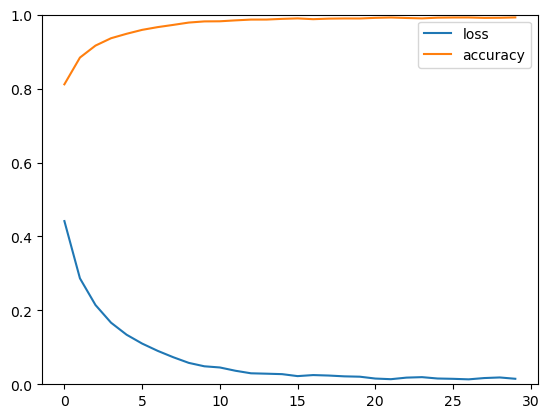

In [39]:
# Buat Grafik Loss dan Acurracy
model_loss[['loss', 'accuracy']].plot(ylim=[0,1]);

Berdasarkan Hasil Sequencing Menggunakan Deep Learning, dapat dilihat bahwa fungsi Loss mengalami penurunan serta Accuracy mengalami peningkatan mendekati 1, yang artinya model ini cukup baik.

### Model Evaluation

In [40]:
#Lakukan Evaluasi Model pada data Validation
evaluation = model.evaluate(X_val_pad, y_val)
print(f'Accuracy: {evaluation[1]*100:.2f}%')

172/172 [==============================] - 2s 10ms/step - loss: 1.8155 - accuracy: 0.7828
Accuracy: 78.28%


### Model Prediction

In [41]:
# Lakukan Pada Data Baru yaitu data Test Untuk Meprediksi
predictions = (model.predict(X_test_pad) > 0.5).astype("int32")   # predict_ clases because is classification problem with the split test
predictions

143/143 [==============================] - 3s 9ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [42]:
y_pred2 = np.where(predictions>=0.5,1,0)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(y_test,y_pred2)*100:.2f}%')

Accuracy: 77.55%


In [44]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1099
           1       0.86      0.84      0.85      3475

    accuracy                           0.78      4574
   macro avg       0.70      0.70      0.70      4574
weighted avg       0.78      0.78      0.78      4574



Text(50.722222222222214, 0.5, 'Actual')

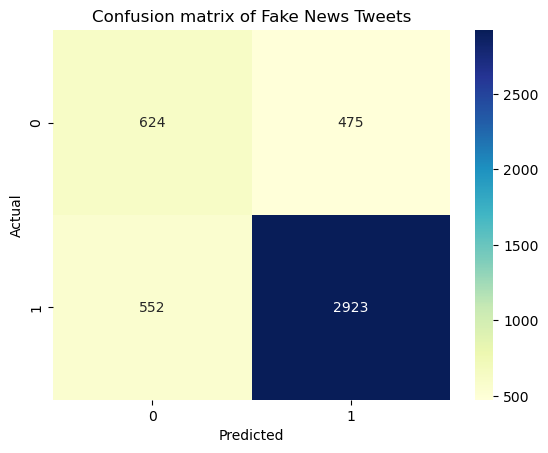

In [45]:
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion matrix of Fake News Tweets')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Hasil Accuracy pada model evaluation dan Prediction menunjukkan nilai yang tidak jauh berbeda Accuracy Validation (77.26%) sedangkan Accuracy pada prediction (75.93%) hal  ini menunjukkan bahwa model yang telah dibuat mampu melakukan prediksi dengan baik pada data train dan dapat memgeneralisasi dengan baik pada data baru. 